In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa
from scipy.stats import multivariate_normal


In [39]:
X = np.genfromtxt("hw08_data_set.csv",delimiter=",")

In [40]:
means = np.genfromtxt("hw08_initial_centroids.csv",delimiter = ",")


In [41]:
real_means = [[5,5],[-5,5],[-5,-5],[5,-5],[5,0],[0,5],[-5,0],[0,-5],[0,0]]
real_cov = [[[0.8,-0.6],[-0.6,0.8]],[[0.8,0.6],[0.6,0.8]],[[0.8,-0.6],[-0.6,0.8]],[[0.8,0.6],[0.6,0.8]],[[0.2,0.0],[0.0,1.2]],[[1.2,0.0],[0.0,0.2]],[[0.2,0.0],[0.0,1.2]],[[1.2,0.0],[0.0,0.2]],[[1.2,0.0],[0.0,0.2]],[[1.6,0.0],[0.0,1.6]]]

In [42]:
K = means.shape[0]
N = X.shape[0]
X = X.reshape(N,2)

In [43]:
prior_labels = np.argmin(spa.distance_matrix(X,means),axis = 1)

In [44]:
priors = np.asarray([np.sum(prior_labels == c) /N for c in range(K)]).reshape(K,1)


In [45]:
cov = np.asarray([np.matmul((X[prior_labels == c] - means[c]).T,X[prior_labels == c] - means[c]) /len(X[prior_labels == c]) for c in range(K)])


In [46]:
def m_step(X,memberships):
    priors = np.asarray([np.sum(memberships[:,c])/N for c in range(K)])
    means = np.vstack([np.matmul(X.T,memberships[:,c])/np.sum(memberships[:,c]) for c in range(K)])
    cov = np.asarray([np.matmul((X-means[c]).T,(X-means[c]) * (memberships[:,c].reshape(N,1))) /np.sum(memberships[:,c]) for c in range(K)])
    return priors,means,cov
    
    

In [47]:
def e_step(X,means,cov,priors):
    memberships = np.zeros((N,K))
    for c in range(K):
        var = multivariate_normal(means[c],cov[c])
        memberships[:,c] = var.pdf(X) * priors[c]
        
    memberships = memberships / (np.sum(memberships,axis = 1).reshape(N,1))
    return memberships

In [48]:
iteration = 0
while True:

    memberships = e_step(X,means,cov,priors)
    priors,means,cov = m_step(X,memberships)
    if iteration > 100:
        break

    iteration +=1

In [49]:
print(means)

[[-4.9508988  -4.98464367]
 [-4.85629614  0.0404331 ]
 [-4.96379877  4.984647  ]
 [ 0.02477868 -5.09014979]
 [-0.09548618 -0.116943  ]
 [-0.03701877  4.91812108]
 [ 5.00933942 -5.02595861]
 [ 4.99839618  0.13777844]
 [ 4.96705774  4.97185503]]


In [50]:
labels = np.argmax(memberships,axis = 1)

In [51]:
means

array([[-4.9508988 , -4.98464367],
       [-4.85629614,  0.0404331 ],
       [-4.96379877,  4.984647  ],
       [ 0.02477868, -5.09014979],
       [-0.09548618, -0.116943  ],
       [-0.03701877,  4.91812108],
       [ 5.00933942, -5.02595861],
       [ 4.99839618,  0.13777844],
       [ 4.96705774,  4.97185503]])

In [52]:
mean_order = [2,6,1,7,8,5,3,4,0]

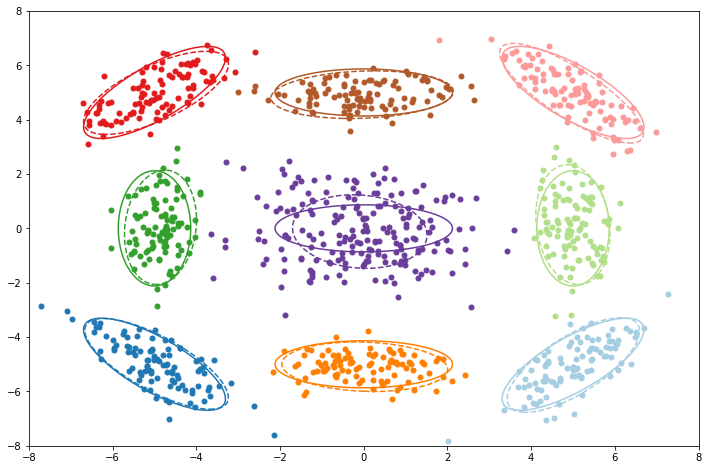

In [54]:
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
x1_interval = np.linspace(-8, +8, 2401)
x2_interval = np.linspace(-8, +8, 2401)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T
plt.figure(figsize=(12,8))
plt.xlim(-8,8)
plt.ylim(-8,8)

for i in range(K):
    D = multivariate_normal.pdf(X_grid,means[i,:],cov = cov[i,:,:])
    D = D.reshape((len(x1_interval), len(x2_interval)))
    D1 = multivariate_normal.pdf(X_grid,real_means[mean_order[i]],real_cov[mean_order[i]])
    D1 = D1.reshape((len(x1_interval), len(x2_interval)))
    
    
    
    

    plt.contour(x1_grid, x2_grid, D, levels = [0.05],
            colors = cluster_colors[i], linestyles = "dashed")
    plt.plot(X[labels == i][:,0],X[labels == i][:,1], color = cluster_colors[i],marker = ".",linestyle = "",markersize = 10)
    plt.contour(x1_grid, x2_grid, D1, levels = [0.05],
            colors = cluster_colors[i], linestyles = "solid")
    